In [4]:
import picamera
import time
import numpy as np
import matplotlib.pyplot as plt 

import tflite_runtime.interpreter as tflite
import cv2
import matplotlib.image as mpimg


import argparse
import logging
import signal
import socket
import sys
import time
import random
from pathlib import Path
import string
#from imutils.video import VideoStream
import cv2
import easygopigo3
from picamera import PiCamera
import imutils as imutils
from joblib import load
import atexit
import skimage.measure
import numpy as np


ModuleNotFoundError: No module named 'skimage'

In [ ]:
# Create instance of the GoPiGo class
gpg = easygopigo3.EasyGoPiGo3()
c = PiCamera()
dataset_path = "/home/pi/group-f/test-sk-learn/TestData"

tempvar = 10




In [2]:
def captureImage():
    with picamera.PiCamera() as camera:
        camera.resolution =(640,480)
        image =np.empty((480,640,3),dtype=np.uint8)
        camera.capture(image,'rgb')
        return image
            
def imgPreprocessing(img):
    #YUV-color,Filtering,resize, reshape
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    #img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img=img.reshape(1,66,200,3)
    img = img/255
    img=img.astype(np.float32)
    return img


def signal_handler(sig, frame):
    """
    Exit gracefully
    :param sig:
    :type sig:
    :param frame:
    :type frame:
    :return:
    :rtype:
    """
    print("You pressed ctrl-c resetting GPG and exiting")
    gpg.reset_all()
    sys.exit()

In [ ]:
# Set the speed.  This is a value that can be experimented with.  You have to
# maintain the right balance between speed, turning rate and inference speed.
WHEEL_SPEED_CONSTANT = 50
left_turn = (0.2, 0.8)
right_turn = (0.2, 0.8)

# Friendly names for the direction predictions
directions = ["Left", "Straight", "Right", "wrong" ]

(1, 66, 200, 3)


[array([[0., 1., 0.]], dtype=float32)]

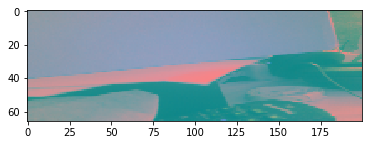

In [3]:

#predictions = []
#test_labels = []
#test_images = []
#label=1

#img=cv2.imread('/home/pi/Desktop/Images/im.jpg')


#test_labels.append(label)
#test_images.append(np.array(img))

#predictions




In [ ]:

if __name__ == '__main__':
    
    time.sleep(2)
    #signal.signal(signal.SIGINT, signal_handler)
    # Load TFLite model and allocate tensors.

    interpreter = tflite.Interpreter(model_path='./model.tflite')
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]

   
    loop_count = 0
    
    time.sleep(3) # just give the system time to settle out
    print('Starting')

    while True:
        img=imgPreprocessing(captureImage())
        #img=imgPreprocessing(img)
        print(img.shape)
        #plt.imshow(img[0])
        interpreter.set_tensor(input_index, img)
        interpreter.invoke()
        predictions = (interpreter.get_tensor(output_index))

        if img is not None:             
            direction = np.argmax(prediction[0])
                # based on the prediction, change the wheel power to make turns
            if direction == 3:
                direction = tempvar

            if direction == 0: # left
                gpg.set_motor_power(gpg.MOTOR_LEFT, WHEEL_SPEED_CONSTANT * left_turn[0])
                gpg.set_motor_power(gpg.MOTOR_RIGHT, WHEEL_SPEED_CONSTANT * left_turn[1])
                tempvar = direction
            elif direction == 1: #straight
                gpg.set_motor_power(gpg.MOTOR_LEFT, WHEEL_SPEED_CONSTANT)
                gpg.set_motor_power(gpg.MOTOR_RIGHT, WHEEL_SPEED_CONSTANT)
                tempvar = direction
            elif direction == 2: # right
                gpg.set_motor_power(gpg.MOTOR_LEFT, WHEEL_SPEED_CONSTANT * right_turn[0])
                gpg.set_motor_power(gpg.MOTOR_RIGHT, WHEEL_SPEED_CONSTANT * right_turn[1])
                tempvar = direction


            else:
                print(f"Unknown direction: {direction}")

        e = time.time()
        print(f"Loop Time: {(e-s)} seconds")

    gpg.reset_all()
    gpg.stop()
    
def exit_handler():
    gpg.stop()
    print("Stopped and exit")
atexit.register(exit_handler)



In [3]:
c=PiCamera()

def captureImage():
    c.capture('/tmp/picture.jpg', use_video_port = True)
    img = cv2.imread('/tmp/picture.jpg')
    return img
            
def imgPreprocessing(img):
    #YUV-color,Filtering,resize, reshape
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    #img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img=img.reshape(1,66,200,3)
    img = img/255
    img=img.astype(np.float32)
    return img

img=imgPreprocessing(captureImage())



PiCameraMMALError: Failed to enable connection: Out of resources

with picamera.PiCamera() as camera:
 #   camera.resolution =(640,480)
  #  i=0
   # fig, axes = plt.subplots(1,3,figsize=(15,5))
    while i<2:
        image =np.empty((480,640,3),dtype=np.uint8)
        camera.capture(image,'rgb')
        axes[i].imshow(image)
        time.sleep(1)
        camera.capture('image.data','yuv')
        
        i+=1
#get dimension

height, width, _=image.shape 
new_width, new_height=(300,166)

#calculate the target image coordinates
left= (width-new_width)//2
top=(height-new_height)//2
right=(width+new_width)//2
bottom=(height+new_height)//2

image=image[300:,top:bottom,:]
#fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[2].imshow(image)

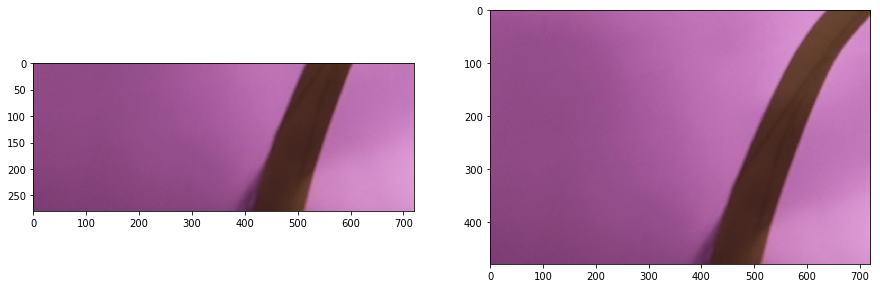

In [47]:

img=cv2.imread('/home/pi/Desktop/Data/sss.jpg') 
img.shape
ig, axes = plt.subplots(1,2,figsize=(15,5)) 
axes[0].imshow(img[200:,:,:])
axes[1].imshow(img)

In [48]:
            
d


In [49]:
img=img[200:,:,:]
img=imgProcTest(img)
img.shape


(1, 66, 200, 3)

In [50]:
img.shape

(1, 66, 200, 3)

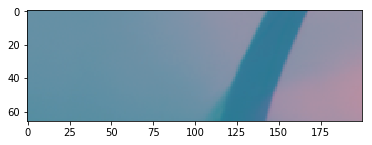

In [51]:
plt.imshow(img[0])

0


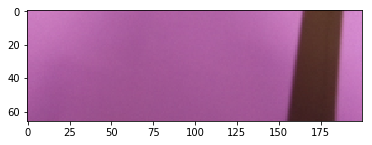

In [101]:
import tflite_runtime.interpreter as tflite
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load TFLite model and allocate tensors.

def imgProcTest(img):
    #YUV-color,Filtering,resize, reshape
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img=img.reshape(1,66,200,3)
    img = img/255
    img=img.astype(np.float32)
    return img


interpreter = tflite.Interpreter(model_path='./model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

predictions = []
test_labels = []
test_images = []
label=1

#img=cv2.imread('/home/pi/Desktop/Images/imageTest.png')
#img=cv2.imread('/home/pi/Desktop/Images/imm.jpg')
img=cv2.imread('/home/pi/Desktop/Data/r.jpg')

img=img[200:,:,:]
img=imgProcTest(img)

interpreter.set_tensor(input_index, img)
interpreter.invoke()
predictions.append(interpreter.get_tensor(output_index))
test_labels.append(label)
#   #plt.imshow(img[0])
# test_images.append(np.array(img))
print(np.argmax(predictions))
plt.imshow(img[0])